In [1]:
# Student - Tim Tieng
# Program - MS in Applied Data Science
# Course - IST-718 Big Data Analytics
# Instructor - Professor Jill Lando
# Group Members - Tim Tieng, Timothy Fajembola, Hans Broders

In [12]:
pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


In [13]:
# Import Packages

import pandas as pd  # data frame operations
from pandas.plotting import scatter_matrix  # scatter plot matrix
import numpy as np  # arrays and math functions
from scipy.stats import uniform  # for training-and-test split
import statsmodels.api as sm  # statistical models (including regression)
import statsmodels.formula.api as smf  # R-like model specification
from sklearn.tree import DecisionTreeRegressor  # machine learning tree
from sklearn.ensemble import RandomForestRegressor # ensemble method
import matplotlib.pyplot as plt # Visualizations
from matplotlib.ticker import FuncFormatter # Formatting Visualizations
import seaborn as sns # Visualizations
import statsmodels.api as sm # Statistical Modeling

In [15]:
# Read in the Data

# Filepath to Spotify_data.csv
csv_Filepath1 = "/Users/timtieng/Library/CloudStorage/OneDrive-Personal/Desktop/Masters in Applied Data Science/IST-718 Big Data Analytics/Project/In Progress/spotify_data.csv"

# Create Dataframe
spotify_raw= pd.read_csv(csv_Filepath1)
print(spotify_raw.shape)

spotify_raw


(1159764, 20)


,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.1390,133.406,240166,3
1,1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.5150,140.182,216387,4
2,2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.1450,139.832,158960,4
3,3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.5080,204.961,304293,4
4,4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.2170,171.864,244320,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1159759,1473391,Nicola Conte,Black Spirits,0m27F0IGHLGAWhqd6ccYst,4,2011,trip-hop,0.373,0.742,10,-6.453,0,0.0736,0.3250,0.000141,0.1590,0.5220,107.951,344013,3
1159760,1473392,Nicola Conte,Quiet Dawn,6er9p611eHEcUCU50j7D57,3,2011,trip-hop,0.516,0.675,7,-7.588,0,0.0326,0.7880,0.000129,0.1300,0.2640,119.897,285067,4
1159761,1473393,Amon Tobin,Morning Ms Candis,7jsMMqxy1tt0rH5FzYcZTQ,2,2011,trip-hop,0.491,0.440,5,-8.512,1,0.0274,0.4770,0.003130,0.0936,0.0351,100.076,214253,4
1159762,1473394,Peace Orchestra,Happy Christmas (War Is Over),77lA1InUaXztuRk2vOzD1S,0,2011,trip-hop,0.480,0.405,0,-13.343,1,0.0276,0.4310,0.000063,0.1250,0.2020,133.885,239133,3


In [16]:
# Structure of the dataframe
spotify_raw.dtypes

"""
Observations
1. 20 attributes, over 1M observations
2. Data types are all currently ints, floats, or string objects
3. Key attributes in this dataframe help describe a song based on characteristics
"""


'\nObservations\n1. 20 attributes, over 1M observations\n2. Data types are all currently ints, floats, or string objects\n3. Key attributes in this dataframe help describe a song based on characteristics\n'

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'popularity'}>,
        <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'danceability'}>],
       [<Axes: title={'center': 'energy'}>,
        <Axes: title={'center': 'key'}>,
        <Axes: title={'center': 'loudness'}>,
        <Axes: title={'center': 'mode'}>],
       [<Axes: title={'center': 'speechiness'}>,
        <Axes: title={'center': 'acousticness'}>,
        <Axes: title={'center': 'instrumentalness'}>,
        <Axes: title={'center': 'liveness'}>],
       [<Axes: title={'center': 'valence'}>,
        <Axes: title={'center': 'tempo'}>,
        <Axes: title={'center': 'duration_ms'}>,
        <Axes: title={'center': 'time_signature'}>]], dtype=object)

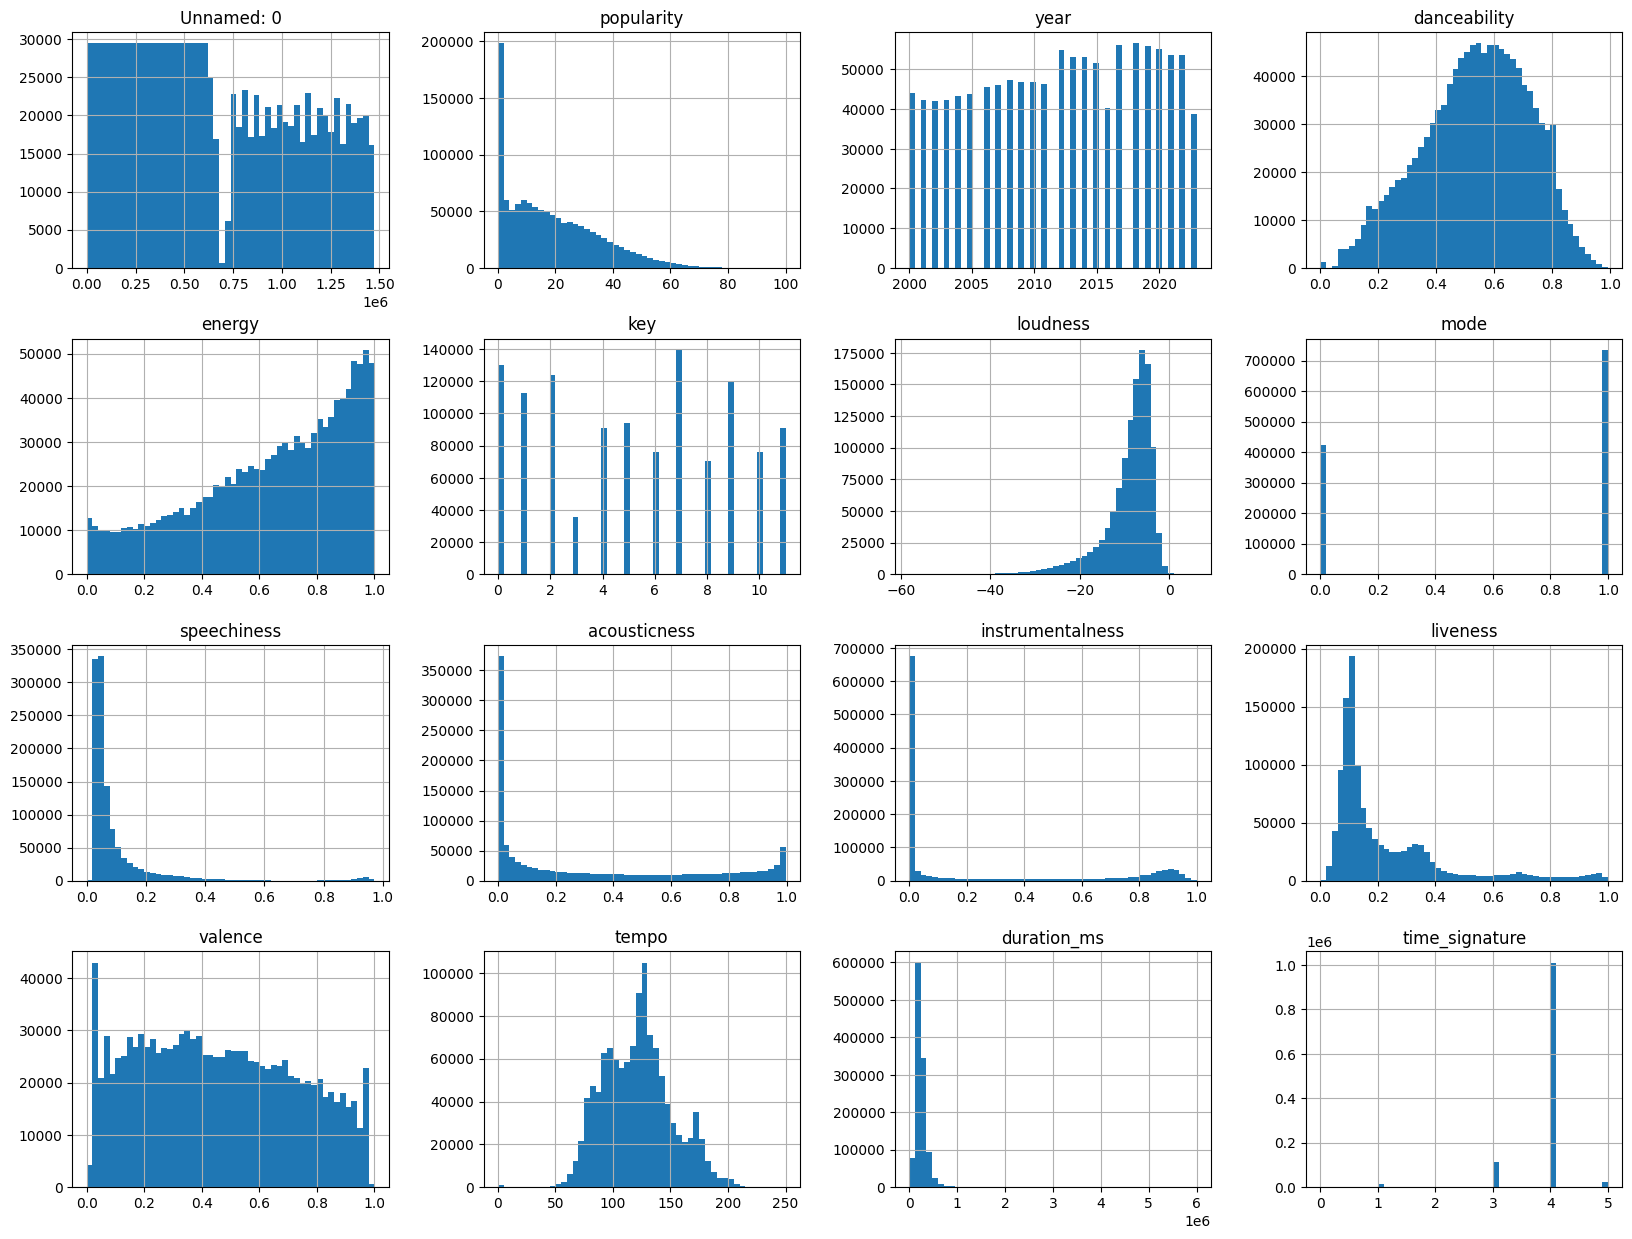

In [17]:
spotify_raw.hist(bins=50, figsize=(20,15)) #hist plot of distribution of columns

In [18]:
# To limit the amount of data we are working with, going to focus on genres
# Step 1 - get unique genre types
unique_genres_count = spotify_raw['genre'].nunique()
print(f'There are {unique_genres_count} unique genres in the dataset')

unique_genres_names = spotify_raw['genre'].unique()
print(f'Unique Genres: \n{unique_genres_names}')

There are 82 unique genres in the dataset
Unique Genres: 
['acoustic' 'afrobeat' 'alt-rock' 'ambient' 'black-metal' 'blues'
 'breakbeat' 'cantopop' 'chicago-house' 'chill' 'classical' 'club'
 'comedy' 'country' 'dance' 'dancehall' 'death-metal' 'deep-house'
 'detroit-techno' 'disco' 'drum-and-bass' 'dub' 'dubstep' 'edm' 'electro'
 'electronic' 'emo' 'folk' 'forro' 'french' 'funk' 'garage' 'german'
 'gospel' 'goth' 'grindcore' 'groove' 'guitar' 'hard-rock' 'hardcore'
 'hardstyle' 'heavy-metal' 'hip-hop' 'house' 'indian' 'indie-pop'
 'industrial' 'jazz' 'k-pop' 'metal' 'metalcore' 'minimal-techno'
 'new-age' 'opera' 'party' 'piano' 'pop' 'pop-film' 'power-pop'
 'progressive-house' 'psych-rock' 'punk' 'punk-rock' 'rock' 'rock-n-roll'
 'romance' 'sad' 'salsa' 'samba' 'sertanejo' 'show-tunes'
 'singer-songwriter' 'ska' 'sleep' 'songwriter' 'soul' 'spanish' 'swedish'
 'tango' 'techno' 'trance' 'trip-hop']


In [19]:
# Determine which genre is the most occuring in the dataset
genre_counts = spotify_raw['genre'].value_counts()
print(genre_counts)

genre
black-metal       21852
gospel            21621
ambient           21389
acoustic          21097
alt-rock          20918
                  ...  
chicago-house      5170
dubstep            4774
detroit-techno     3920
rock               3319
songwriter          589
Name: count, Length: 82, dtype: int64


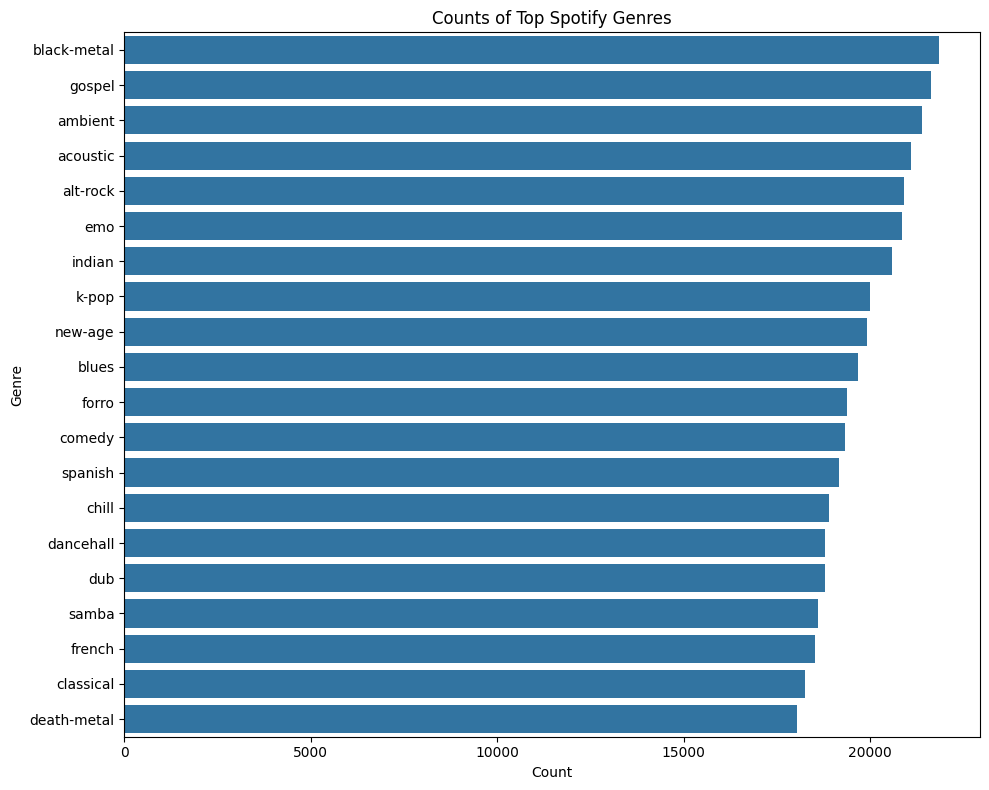

In [20]:
# Visualize Genre Count
genre_counts_df = genre_counts.reset_index()
genre_counts_df.columns = ['Genre', 'Count']

# To reduce overcrowding in the visual, Select the top N genres
top_20_genres = genre_counts_df.nlargest(20, 'Count') # first param == amount we want displayed

plt.figure(figsize=(10, 8)) # You can adjust the size as needed

# Create the bar plot
sns.barplot(x='Count', y='Genre', data=top_20_genres)

# Option 3: Rotate labels (if the plot is vertical)
# plt.xticks(rotation=90) # Uncomment if using a vertical bar plot

plt.title('Counts of Top Spotify Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlapping
plt.show()

In [21]:
# Selecting alt-rock to focus analysis on
alt_rock_spotify_data = spotify_raw[spotify_raw['genre']== 'alt-rock']
alt_rock_spotify_data

# reduced down to ~21K observations, 20 columns

,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
1770,1770,Neon Trees,Everybody Talks,2iUmqdfGZcHIhS3b9E9EWq,77,2012,alt-rock,0.471,0.924,8,-3.906,1,0.0586,0.003010,0.000000,0.3130,0.7250,154.961,177280,4
1771,1771,Deftones,Rosemary,4FEr6dIdH6EqLKR0jB560J,71,2012,alt-rock,0.285,0.613,5,-6.412,1,0.0421,0.018500,0.100000,0.1140,0.0772,126.628,413347,4
1772,1772,Black Veil Brides,In The End,1RTYixE1DD3g3upEpmCJpa,68,2012,alt-rock,0.442,0.939,8,-4.180,1,0.0941,0.000183,0.005890,0.0857,0.2700,140.021,228280,4
1773,1773,Thousand Foot Krutch,Courtesy Call,0AOmbw8AwDnwXhHC3OhdVB,71,2012,alt-rock,0.531,0.638,11,-5.145,0,0.0809,0.004090,0.000000,0.0822,0.4450,164.079,236898,4
1774,1774,Deftones,Entombed,4bLCPfBLKlqiONo6TALTh5,65,2012,alt-rock,0.399,0.753,10,-3.882,1,0.0375,0.005930,0.128000,0.3660,0.1670,130.055,299240,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1115497,1404250,Psychostick,Hate Times 8,5LeEQUgDPX00zuit45yUwf,27,2011,alt-rock,0.674,0.930,1,-4.507,1,0.1740,0.057100,0.000006,0.2940,0.8380,89.314,212333,4
1115498,1404251,Switchfoot,Thrive,42X58dLQKMGKG3p7DsITWn,27,2011,alt-rock,0.707,0.580,7,-8.185,1,0.0265,0.003220,0.022200,0.1200,0.0724,113.985,312213,4
1115499,1404252,Soil,The One,17zcvGKe8RWEC5rVd7SKIc,30,2011,alt-rock,0.445,0.912,10,-5.314,1,0.0744,0.000546,0.000586,0.4360,0.7920,162.989,169253,4
1115500,1404253,Destroyer,Poor in Love,7LJn9rmki2eFKad2aRAJV0,25,2011,alt-rock,0.591,0.457,4,-10.352,1,0.0325,0.138000,0.025800,0.1910,0.1880,114.964,206267,4


In [22]:
# Unique Artists
count_unique_alt_artists = alt_rock_spotify_data['artist_name'].nunique()
print(f'There are {count_unique_alt_artists} unique Alt-Rock artists')

unique_alt_artist_values = alt_rock_spotify_data['artist_name'].unique()
unique_alt_artist_values

There are 1527 unique Alt-Rock artists


array(['Neon Trees', 'Deftones', 'Black Veil Brides', ..., 'andymori',
       'Paul Kelly', 'Tanya Donelly'], dtype=object)

In [25]:
# Correlation Matrix to see bi-variable relationships
correlation_matrix = alt_rock_spotify_data.corr()
print(correlation_matrix)

ValueError: could not convert string to float: 'Neon Trees'

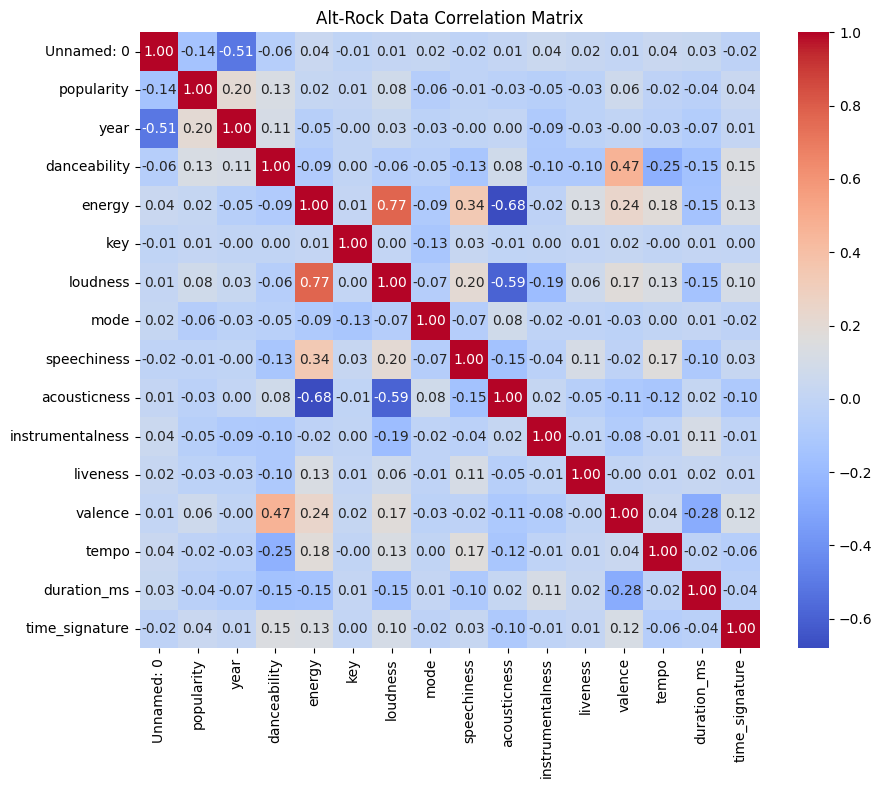

In [11]:
# Visualize the correlation matrix
plt.figure(figsize=(10, 8))  #  set the figure size
plt.title('Alt-Rock Data Correlation Matrix')
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

In [ ]:
"""
Correlation Matrix Alt Rock Observations
1. Popularity Vs Year - Slightly positive correlation between the two attributes and is the largest value in the
matrix when evaluating "Popularity" attribute. This suggest as "Modern" age songs may be appealing to the current user
base of spotify.

2. Valence vs Danceability - There is a strong postive correlation between the two attributes. That as the Valence of
a song increases, the song's danceability increases.

3. Speechiness vs Energy - There seems to be a slightly positive correlation between these two. This may shed light on
as songs tend to have more spoken lyrics, it has a higher energy rating. This COULD mean that the user-base values 
meaningful lyrics or lyrics that resonate to the user/align with the genre.

4. Acousticness vs Energy vs Loudness - Strong negative correlation; makes sense as acoustic songs are more mellow and tend to not 
be as upbeat. Same goes with loudness. 

Thoughts - I think subsettting by genres introduces unintential biases/conditions that makes predictions models skewed form the start
; I think the group needs to filter by year or something else to have a better view of the data
"""

In [26]:
# subset by year range >= X Year
spotify_updated = spotify_raw[spotify_raw['year'] >= 2017]
spotify_updated

,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
253072,253072,Chord Overstreet,Hold On,5vjLSffimiIP26QG5WcN2K,79,2017,acoustic,0.618,0.443,2,-9.681,1,0.0526,0.46900,0.000000,0.0829,0.167,119.949,198853,4
253073,253073,Iron & Wine,Call It Dreaming,1MxHIIzcTeFnaNsDGY3pfj,63,2017,acoustic,0.512,0.501,5,-9.971,1,0.0325,0.60900,0.000063,0.0973,0.726,79.989,231755,4
253074,253074,Kina Grannis,Iris,5oV8bZaShr2d01FFMHBUPq,60,2017,acoustic,0.497,0.130,6,-15.571,1,0.0436,0.84100,0.000000,0.1110,0.179,130.769,181136,3
253075,253075,Andrew Belle,When the End Comes,3Et4LKZLnXygPYfNdeB3D3,52,2017,acoustic,0.541,0.575,9,-9.463,1,0.0491,0.67700,0.215000,0.1020,0.428,91.980,354400,4
253076,253076,NEEDTOBREATHE,WALKING ON WATER,0WWUC8RjWvuBTkiiFDxyQf,48,2017,acoustic,0.534,0.784,0,-6.542,1,0.0476,0.12500,0.000009,0.0753,0.251,118.011,246933,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
622646,622646,Lemongrass,Grapes - Remix,3H5dcp3GdIejynK7vCcPxX,0,2023,trip-hop,0.660,0.598,0,-7.629,1,0.0359,0.12300,0.276000,0.1040,0.370,90.017,386739,4
622647,622647,Groove Armada,Rescue Me - Roland Leesker's You Got To Dance ...,3ZZ7FgBdEv5Eq537nTvdYH,1,2023,trip-hop,0.769,0.604,9,-13.930,1,0.0634,0.00582,0.246000,0.1140,0.330,122.999,423418,4
622648,622648,Brazilian Girls,Good Time - Radio Edit,2BRpsndU96kgMjlfKjyY8q,0,2023,trip-hop,0.803,0.847,10,-5.808,0,0.0765,0.08750,0.097600,0.2890,0.573,129.987,180413,4
622649,622649,Brazilian Girls,Good Time,4da5NJr6Pm72tdEzzbK5Us,1,2023,trip-hop,0.794,0.839,10,-6.373,0,0.0526,0.04980,0.106000,0.1370,0.767,129.980,228600,4


array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'popularity'}>,
        <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'danceability'}>],
       [<Axes: title={'center': 'energy'}>,
        <Axes: title={'center': 'key'}>,
        <Axes: title={'center': 'loudness'}>,
        <Axes: title={'center': 'mode'}>],
       [<Axes: title={'center': 'speechiness'}>,
        <Axes: title={'center': 'acousticness'}>,
        <Axes: title={'center': 'instrumentalness'}>,
        <Axes: title={'center': 'liveness'}>],
       [<Axes: title={'center': 'valence'}>,
        <Axes: title={'center': 'tempo'}>,
        <Axes: title={'center': 'duration_ms'}>,
        <Axes: title={'center': 'time_signature'}>]], dtype=object)

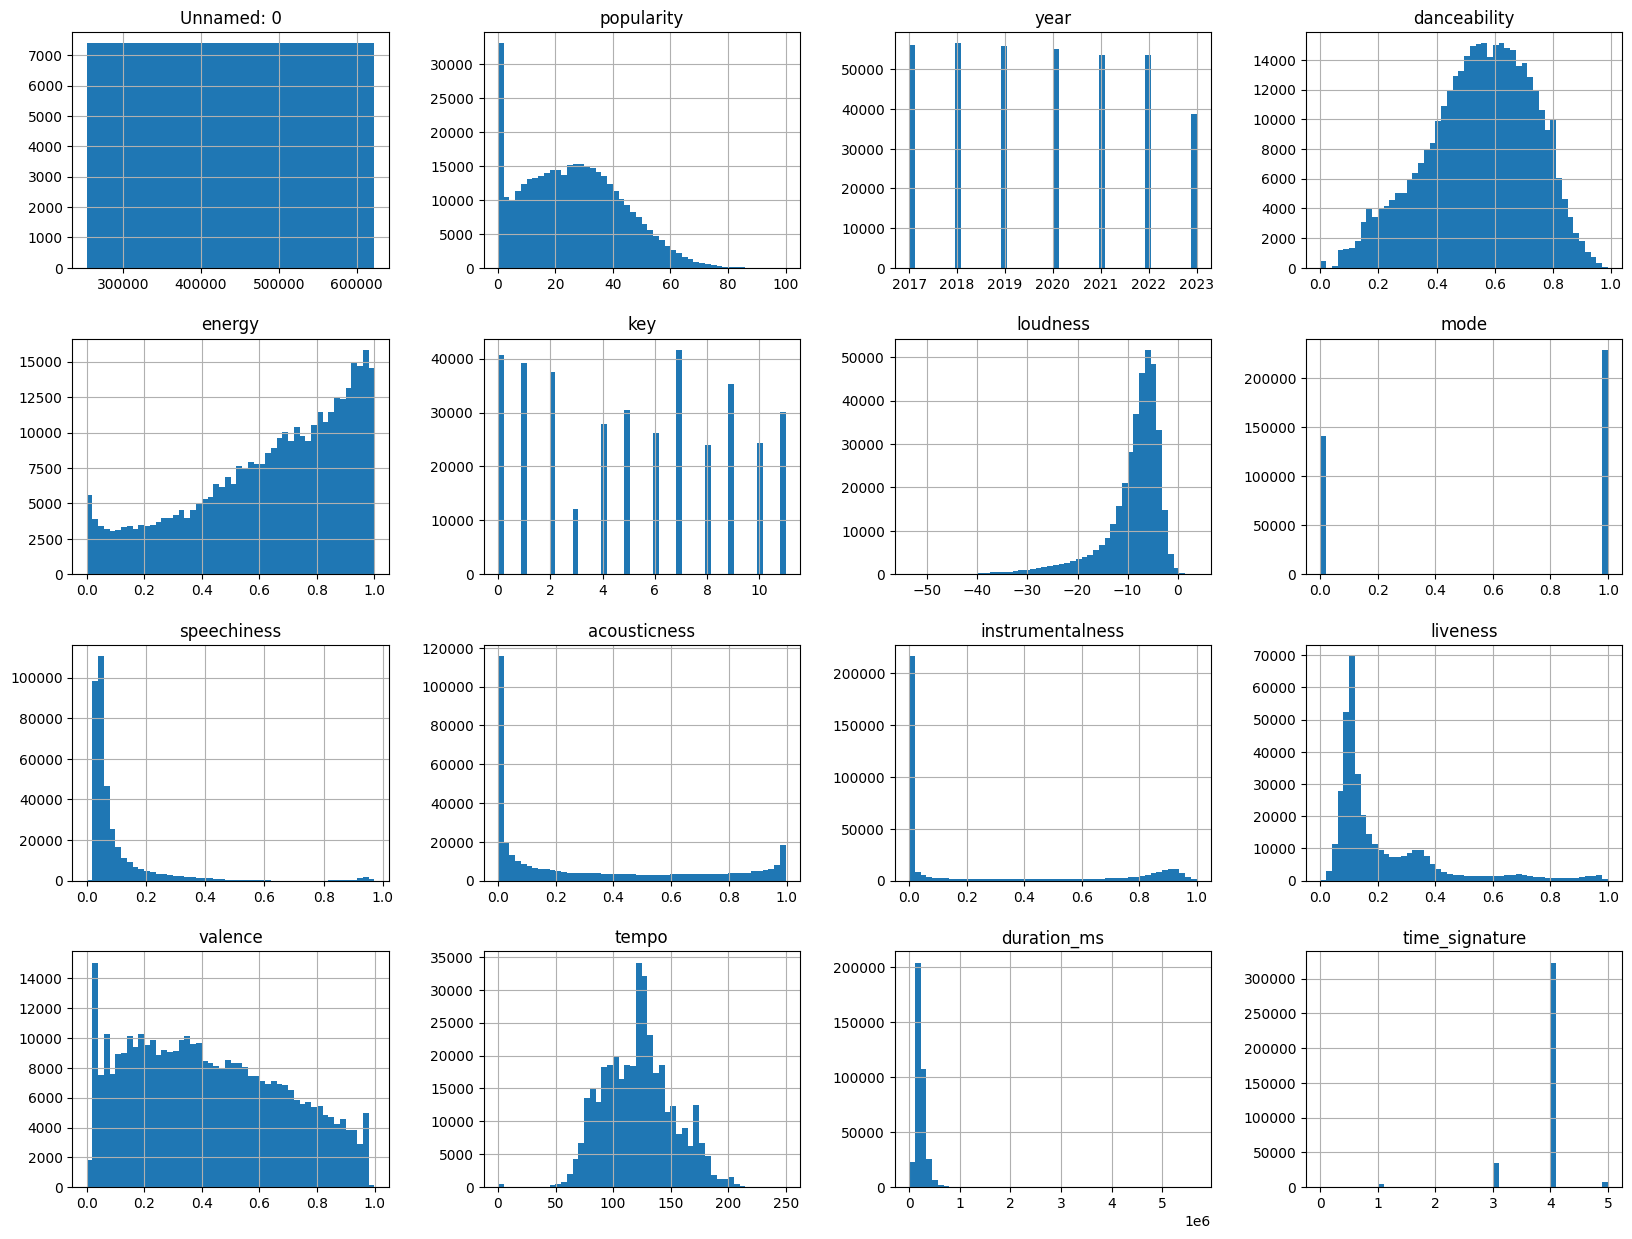

In [27]:
# Visualize histograms of spotify_updated attributes
spotify_updated.hist(bins=50, figsize=(20,15))

In [29]:
# Correlation Matrix for spotyify_updated

spotify_updated_numeric = spotify_updated.select_dtypes(include=[np.number])

correlation_matrix_updated = spotify_updated_numeric.corr()
print(correlation_matrix_updated)

                  Unnamed: 0  popularity      year  danceability    energy  \
Unnamed: 0          1.000000    0.046278  0.989039     -0.007386 -0.026688   
popularity          0.046278    1.000000  0.053588      0.164485 -0.031140   
year                0.989039    0.053588  1.000000     -0.003980 -0.018716   
danceability       -0.007386    0.164485 -0.003980      1.000000  0.158863   
energy             -0.026688   -0.031140 -0.018716      0.158863  1.000000   
key                 0.000817    0.004099  0.001626      0.030826  0.043731   
loudness           -0.044356    0.075690 -0.036793      0.317878  0.775090   
mode                0.001170   -0.024014 -0.001032     -0.063175 -0.073767   
speechiness        -0.027801   -0.051421 -0.010627      0.094162  0.106791   
acousticness        0.027825   -0.044937  0.013738     -0.184311 -0.771562   
instrumentalness    0.009098   -0.150262  0.018372     -0.215520 -0.218462   
liveness           -0.007338   -0.097073 -0.011556     -0.126784

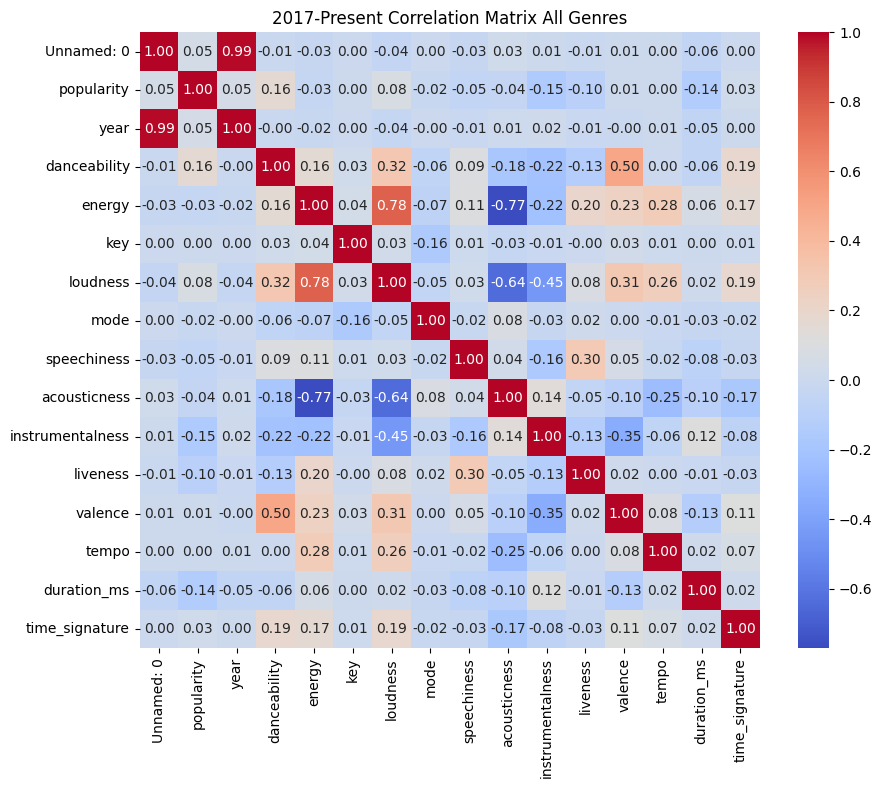

In [30]:
# Heatmap for Correlation_matrix_updated
plt.figure(figsize=(10, 8))  #  set the figure size
plt.title('2017-Present Correlation Matrix All Genres')
sns.heatmap(correlation_matrix_updated, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

In [31]:
# Model
# employ training-and-test regimen for model validation
np.random.seed(4444)
spotify_updated['runiform'] = uniform.rvs(loc = 0, scale = 1, size = len(spotify_updated))
updated_2017ToPresent_train = spotify_updated[spotify_updated['runiform'] >= 0.33]
updated_2017ToPresent_test = spotify_updated[spotify_updated['runiform'] < 0.33]
# check training data frame
print('\n 2017-2023 train data frame (rows, columns): ',\
    updated_2017ToPresent_train.shape)
print(updated_2017ToPresent_train.head())
# check test data frame
print('\n 2017-2023 test data frame (rows, columns): ',\
    updated_2017ToPresent_test.shape)
print(updated_2017ToPresent_test.head())



 2017-2023 train data frame (rows, columns):  (247612, 21)
        Unnamed: 0       artist_name                       track_name  \
253072      253072  Chord Overstreet                          Hold On   
253074      253074      Kina Grannis                             Iris   
253075      253075      Andrew Belle               When the End Comes   
253076      253076     NEEDTOBREATHE                 WALKING ON WATER   
253077      253077     NEEDTOBREATHE  HARD LOVE (feat. Lauren Daigle)   

                      track_id  popularity  year     genre  danceability  \
253072  5vjLSffimiIP26QG5WcN2K          79  2017  acoustic         0.618   
253074  5oV8bZaShr2d01FFMHBUPq          60  2017  acoustic         0.497   
253075  3Et4LKZLnXygPYfNdeB3D3          52  2017  acoustic         0.541   
253076  0WWUC8RjWvuBTkiiFDxyQf          48  2017  acoustic         0.534   
253077  4ahfLYf0VLVVvN3sdOyQN2          49  2017  acoustic         0.449   

        energy  key  ...  mode  speechiness 

/var/folders/55/ln_tx97d091c99tgj4hbb_kr0000gn/T/ipykernel_6250/112277744.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_updated['runiform'] = uniform.rvs(loc = 0, scale = 1, size = len(spotify_updated))


In [36]:
# Model Continued
model = str('popularity ~ danceability + loudness + instrumentalness + liveness + duration_ms + energy + acousticness')

In [37]:
# fit the model to the training set
train_model_fit = smf.ols(model, data = updated_2017ToPresent_train).fit()
# summary of model fit to the training set
print(train_model_fit.summary())
# training set predictions from the model fit to the training set
updated_2017ToPresent_train['predict_pop'] = train_model_fit.fittedvalues

# test set predictions from the model fit to the training set
updated_2017ToPresent_test['predict_pop'] = train_model_fit.predict(updated_2017ToPresent_test)


                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     3004.
Date:                Thu, 07 Mar 2024   Prob (F-statistic):               0.00
Time:                        11:33:51   Log-Likelihood:            -1.0439e+06
No. Observations:              247612   AIC:                         2.088e+06
Df Residuals:                  247604   BIC:                         2.088e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           40.5407      0.287  

/var/folders/55/ln_tx97d091c99tgj4hbb_kr0000gn/T/ipykernel_6250/3994786393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_2017ToPresent_train['predict_pop'] = train_model_fit.fittedvalues
/var/folders/55/ln_tx97d091c99tgj4hbb_kr0000gn/T/ipykernel_6250/3994786393.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_2017ToPresent_test['predict_pop'] = train_model_fit.predict(updated_2017ToPresent_test)


In [ ]:
'''
R-Squared - 7.8% of variance in popularity rating is attributed to the dependent variables; this is really low and 
alludes to there are other aspects that contribute to popularity ratings

F-Statistic - 3004 suggests that the independent variables chosen have a signficant effect on popularity
'''

In [38]:
# Model Continued - 2nd attempt to reduce independent variables to see what happens
model2 = str('popularity ~ danceability + loudness + instrumentalness ')

In [39]:
# fit the model2 to the training set
train_model_fit = smf.ols(model2, data = updated_2017ToPresent_train).fit()
# summary of model fit to the training set
print(train_model_fit.summary())
# training set predictions from the model fit to the training set
updated_2017ToPresent_train['predict_pop'] = train_model_fit.fittedvalues

# test set predictions from the model fit to the training set
updated_2017ToPresent_test['predict_pop'] = train_model_fit.predict(updated_2017ToPresent_test)

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     3597.
Date:                Thu, 07 Mar 2024   Prob (F-statistic):               0.00
Time:                        11:39:54   Log-Likelihood:            -1.0487e+06
No. Observations:              247612   AIC:                         2.097e+06
Df Residuals:                  247608   BIC:                         2.098e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           18.9532      0.137  

/var/folders/55/ln_tx97d091c99tgj4hbb_kr0000gn/T/ipykernel_6250/2378269302.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_2017ToPresent_train['predict_pop'] = train_model_fit.fittedvalues
/var/folders/55/ln_tx97d091c99tgj4hbb_kr0000gn/T/ipykernel_6250/2378269302.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_2017ToPresent_test['predict_pop'] = train_model_fit.predict(updated_2017ToPresent_test)


In [ ]:
'''
Interpretation of model 2
lower r-squared value
still stasticially significant
Model1 accounts for more change in popularity rating compared to model2

So What- the simpler model offers ease of interpretation and use, but sacrifices some of the explanatory ability
and fit of the more complex model

'''

In [41]:
#Prediction model using naive bayes
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import accuracy_score

X_train = updated_2017ToPresent_train.drop(columns=['popularity']) #Target variable for prediction
y_train = updated_2017ToPresent_train['popularity']
X_test = updated_2017ToPresent_test.drop(columns=['popularity'])
y_test = updated_2017ToPresent_test['popularity']

X_train.drop(columns=['artist_name','track_name','track_id','genre'], inplace=True)
X_test.drop(columns=['artist_name','track_name','track_id','genre'], inplace=True)


#Transform categorical variables to numerical to avoid errors when running naive bayes
#label_encoder = LabelEncoder()
#X_train['artist_name'] = label_encoder.fit_transform(X_train['artist_name'])
#X_test['artist_name'] = label_encoder.transform(X_test['artist_name'])

#X_train['track_name'] = label_encoder.fit_transform(X_train['track_name'])
#X_test['track_name'] = label_encoder.transform(X_test['track_name'])

#X_train['track_id'] = label_encoder.fit_transform(X_train['track_id'])
#X_test['track_id'] = label_encoder.transform(X_test['tack_id'])

#Model creation
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
print('The model accuracy is:', accuracy)

'''Naive Bayes accuracy is about the same as model1 OLS regression'''

The model accuracy is: 0.07229824460714783


'Naive Bayes accuracy is about the same as model1 OLS regression'